In [55]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import warnings

from sys import platform

if platform == "win32":
    path = 'C:/Users/olive/GitHub/f1-analytics/'
elif platform == "darwin":
    path = '~/Documents/GitHub/f1-analytics/'

warnings.filterwarnings("ignore", category=RuntimeWarning) 
pd.options.mode.chained_assignment = None  # default='warn'

%matplotlib inline

In [56]:
N = 2021

In [57]:
### Load race and mereged DataFrames

data = pd.read_csv(path+'data/ml_input.csv')

df = data.copy()
# df.podium = df.podium.map(lambda x: 1 if x == 1 else 0)

train = df[df.season < N]
test = df[df.season == N]

In [58]:
train.columns

Index(['season', 'round', 'podium', 'driver', 'constructor', 'circuit_id',
       'driver_points_from', 'qualifying_pos', 'starting_grid', 'stage_q3',
       'driver_points_per', 'constructor_points_per',
       'constructor_points_before', 'driver_points_before',
       'driver_wins_before', 'constructor_wins_before',
       'constructor_standings_before', 'driver_standings_before',
       'driver_last_3', 'constructor_last_3'],
      dtype='object')

In [59]:
train.head()

,season,round,podium,driver,constructor,circuit_id,driver_points_from,qualifying_pos,starting_grid,stage_q3,driver_points_per,constructor_points_per,constructor_points_before,driver_points_before,driver_wins_before,constructor_wins_before,constructor_standings_before,driver_standings_before,driver_last_3,constructor_last_3
0,2014,1,1,nico_rosberg,mercedes,albert_park,25.0,3,3,1,0.0,0.0,0.0,0.0,0,0,1,1,0.0,0.0
1,2014,1,2,kevin_magnussen,mclaren,albert_park,18.0,4,4,1,0.0,0.0,0.0,0.0,0,0,1,1,0.0,0.0
2,2014,1,3,jenson_button,mclaren,albert_park,15.0,11,10,0,0.0,0.0,0.0,0.0,0,0,1,1,0.0,0.0
3,2014,1,4,fernando_alonso,ferrari,albert_park,12.0,5,5,1,0.0,0.0,0.0,0.0,0,0,1,1,0.0,0.0
4,2014,1,5,valtteri_bottas,williams,albert_park,10.0,10,15,1,0.0,0.0,0.0,0.0,0,0,1,1,0.0,0.0


In [60]:
model = LinearRegression()
scaler = StandardScaler()

X_train = train.driver_last_3.values
y_train = train.podium

X_train = np.asarray(pd.DataFrame(X_train))
y_train = np.asarray(pd.DataFrame(y_train))

X_test = test.driver_last_3.values
X_test = np.asarray(pd.DataFrame(X_test))
y_actual = test.podium

model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [61]:
y_predict

array([[13.05032404],
       [13.05032404],
       [13.05032404],
       [13.05032404],
       [13.05032404],
       [13.05032404],
       [13.05032404],
       [13.05032404],
       [13.05032404],
       [13.05032404],
       [13.05032404],
       [13.05032404],
       [13.05032404],
       [13.05032404],
       [13.05032404],
       [13.05032404],
       [13.05032404],
       [13.05032404],
       [13.05032404],
       [13.05032404],
       [ 9.90678339],
       [ 8.68429537],
       [10.95463027],
       [11.65319486],
       [12.35175945],
       [12.00247716],
       [13.05032404],
       [12.87568289],
       [13.05032404],
       [13.05032404],
       [11.30391257],
       [12.70104174],
       [13.05032404],
       [13.05032404],
       [13.05032404],
       [13.05032404],
       [13.05032404],
       [10.25606569],
       [13.05032404],
       [13.05032404],
       [ 5.36611358],
       [ 5.54075472],
       [10.25606569],
       [11.30391257],
       [ 8.33501307],
       [ 9

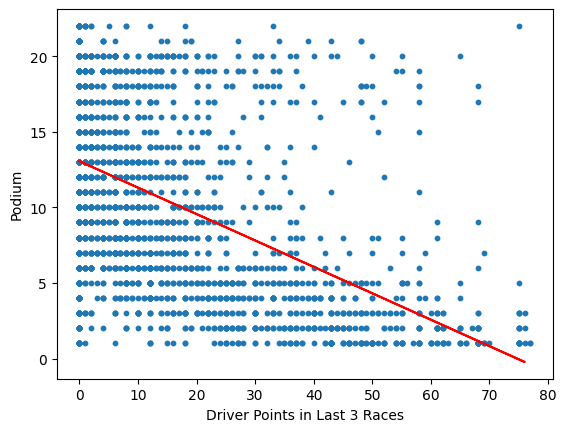

In [62]:
# predicted values

plt.scatter(X_train, y_train, s=10)
plt.xlabel('Driver Points in Last 3 Races')
plt.ylabel('Podium')
plt.plot(X_test, y_predict, color='r')
plt.show()

In [63]:
# model evaluation
rmse = mean_squared_error(y_actual, y_predict)
r2 = r2_score(y_actual, y_predict)

In [64]:
# printing values
print('Slope:' , model.coef_)
print('Intercept:', model.intercept_)
print(f'RMSE: {rmse}')
print(f'R2: {r2}')

Slope: [[-0.17464115]]
Intercept: [13.05032404]
RMSE: 24.610979461524423
R2: 0.25837185416157804
